In [1]:
import mediapipe as mp
import pandas as pd
import numpy as np
import sklearn
import cv2

In [2]:
def get_input():

    indices=[0, 1, 2, 4, 5, 6, 7, 10, 13, 14, 17, 19, 21, 33, 37, 39, 40, 45, 48, 54, 58, 61, 64, 67, 78, 80, 81, 82, 84, 87, 88, 91, 93, 94, 95, 97, 98, 103, 109, 115, 127, 132, 133, 136, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, 157, 158, 159, 160, 161, 162, 163, 168, 172, 173, 176, 178, 181, 185, 191, 195, 197, 220, 234, 246, 249, 251, 263, 267, 269, 270, 275, 278, 284, 288, 291, 294, 297, 308, 310, 311, 312, 314, 317, 318, 321, 323, 324, 326, 327, 332, 338, 344, 356, 361, 362, 365, 373, 374, 375, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 389, 390, 397, 398, 400, 402, 405, 409, 415, 440, 454, 466]
    cap = cv2.VideoCapture(0)
    face_detection = mp.solutions.face_detection.FaceDetection()
    mp_face_mesh = mp.solutions.face_mesh
    face_mesh = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5)
    t_some=[]

    success, frame = cap.read()
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = face_detection.process(frame_rgb)

    if results.detections:
        for detection in results.detections:
            bounding_box = detection.location_data.relative_bounding_box
            x = int(bounding_box.xmin * frame.shape[1])
            y = int(bounding_box.ymin * frame.shape[0])
            w = int(bounding_box.width * frame.shape[1])
            h = int(bounding_box.height * frame.shape[0])
    else:
        print("bounding box detection failed")

    crop_img = frame[y-30:y+h+10, x-20:x+w+20]

    rgb_frame = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
    results = face_mesh.process(rgb_frame)

    if results.multi_face_landmarks:
        for i in results.multi_face_landmarks:
            for j in indices:
                t_some.append(i.landmark[j].x)
                t_some.append(i.landmark[j].y)
    else:
        print("feature detection failed")
                
    cap.release()
    return t_some, crop_img

In [15]:
df=pd.read_csv('C:\\Users\\RS7un\\OneDrive\\Desktop\\Projects\\neck device\\code\\Neck angle prediction using ML\\data\\ud_train_crop_some.csv')
print(df)
df_test=pd.read_csv('C:\\Users\\RS7un\\OneDrive\\Desktop\\Projects\\neck device\\code\\Neck angle prediction using ML\\data\\ud_test_crop_some.csv')
print(df_test)

             1         2         3         4         5         6         7  \
0     0.497830  0.656260  0.494323  0.513745  0.495441  0.557862  0.492878   
1     0.512213  0.657584  0.506015  0.512097  0.507847  0.555619  0.504144   
2     0.507781  0.652140  0.505115  0.504953  0.506331  0.549895  0.503767   
3     0.511148  0.647941  0.508560  0.497830  0.509264  0.544724  0.506988   
4     0.508443  0.633382  0.508592  0.483023  0.508474  0.529388  0.507587   
...        ...       ...       ...       ...       ...       ...       ...   
1211  0.526105  0.949865  0.517949  0.882144  0.521556  0.878795  0.516323   
1212  0.528318  0.962804  0.524837  0.898697  0.526393  0.893266  0.523714   
1213  0.529773  0.952597  0.523098  0.888213  0.526591  0.883398  0.521546   
1214  0.528808  0.955249  0.525107  0.891124  0.527078  0.886299  0.523978   
1215  0.523846  0.954756  0.519484  0.893721  0.522115  0.887746  0.518313   

             8         9        10  ...       256       257    

In [4]:
df.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

In [16]:
df=df.dropna().reset_index(drop=True)
df.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

In [6]:
df_test.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

In [17]:
df_test=df_test.dropna().reset_index(drop=True)
df_test.isnull().sum()

1         0
2         0
3         0
4         0
5         0
         ..
261       0
262       0
263       0
264       0
degree    0
Length: 265, dtype: int64

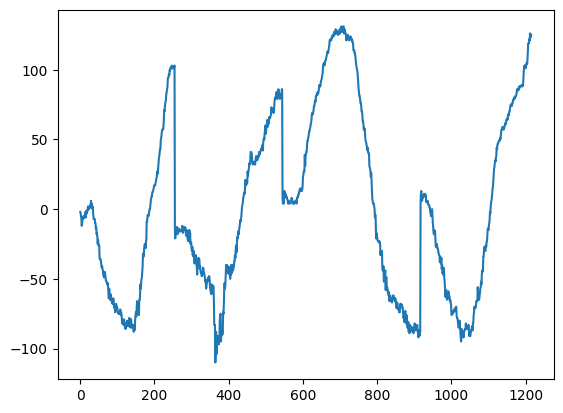

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(len(df['1'].tolist())),df['degree'].tolist())
plt.show()

In [19]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values
print(X)
print(Y)

X_test = df_test.iloc[:, :-1].values
Y_test = df_test.iloc[:, -1].values
print(X_test)
print(Y_test)

[[0.4978303  0.65625977 0.49432257 ... 0.41153565 0.75298393 0.29566657]
 [0.51221347 0.65758413 0.50601524 ... 0.4021084  0.7635411  0.28980502]
 [0.50778091 0.65214044 0.50511539 ... 0.40236026 0.76838255 0.28545696]
 ...
 [0.52977312 0.95259726 0.52309793 ... 0.45734411 0.77072442 0.51692104]
 [0.52880847 0.95524919 0.52510714 ... 0.46256795 0.76840377 0.52138734]
 [0.52384633 0.95475566 0.51948357 ... 0.45820761 0.76998508 0.52111095]]
[ -2  -3  -5 ... 123 124 125]
[[0.48429856 0.66992796 0.48047069 ... 0.4329434  0.74278605 0.31954688]
 [0.48016667 0.67890334 0.47700781 ... 0.43449101 0.7389344  0.32433224]
 [0.48000699 0.67575985 0.47632217 ... 0.4327507  0.7371003  0.32100272]
 ...
 [0.50337106 0.89150721 0.49255377 ... 0.429115   0.78627539 0.48858571]
 [0.4973036  0.8889178  0.48557392 ... 0.41415757 0.77440757 0.48006666]
 [0.49743932 0.894683   0.48107669 ... 0.41885573 0.76699048 0.49101904]]
[   4    8    7    8    8    9    8   10    5    3    7    8    7    7
    6    7 

In [20]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X, Y)

DecisionTreeRegressor()

In [23]:
import joblib

joblib.dump(regressor, "Decissiontree_ud.joblib")

['Decissiontree_ud.joblib']

In [21]:
y_pred = regressor.predict(X_test)
print(np.concatenate((Y_test.reshape(len(Y_test),1), y_pred.reshape(len(y_pred),1)),1))

[[   4.    4.]
 [   8.    8.]
 [   7.    7.]
 [   8.    8.]
 [   8.    8.]
 [   9.    9.]
 [   8.    8.]
 [  10.   10.]
 [   5.    5.]
 [   3.    3.]
 [   7.    7.]
 [   8.    8.]
 [   7.    7.]
 [   7.    7.]
 [   6.    6.]
 [   7.    8.]
 [   6.    6.]
 [   7.    7.]
 [   6.    6.]
 [   4.    4.]
 [   5.    6.]
 [   6.    6.]
 [   6.    6.]
 [   5.    5.]
 [   5.    5.]
 [   3.    3.]
 [   3.    3.]
 [   3.    3.]
 [   3.    3.]
 [   4.    4.]
 [   5.    5.]
 [   2.    2.]
 [   4.    4.]
 [   4.    4.]
 [   3.    3.]
 [   2.    2.]
 [   3.    3.]
 [   1.    1.]
 [  -2.   -2.]
 [  -2.   -2.]
 [  -8.   -9.]
 [  -9.   -9.]
 [ -10.  -11.]
 [ -11.  -11.]
 [ -13.  -13.]
 [ -19.  -19.]
 [ -25.  -25.]
 [ -26.  -26.]
 [ -29.  -29.]
 [ -27.  -27.]
 [ -23.  -22.]
 [ -26.  -26.]
 [ -28.  -28.]
 [ -31.  -31.]
 [ -34.  -34.]
 [ -31.  -31.]
 [ -31.  -31.]
 [ -36.  -36.]
 [ -29.  -30.]
 [ -33.  -33.]
 [ -35.  -35.]
 [ -40.  -40.]
 [ -39.  -39.]
 [ -42.  -42.]
 [ -38.  -38.]
 [ -42.  -43.]
 [ -43.  -

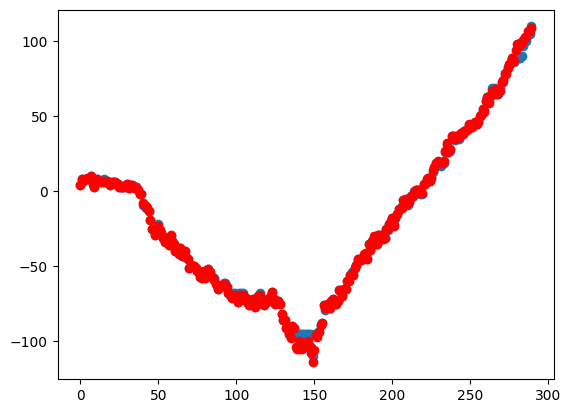

In [22]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_pred)), y_pred)
plt.scatter(range(len(y_pred)), Y_test, color='red')
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

r2 = r2_score(Y_test, y_pred)
print("R-squared:", r2) 

mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

mse = mean_absolute_error(Y_test, y_pred)
print("Mean Absolute Error:", mse)

R-squared: 0.9903639389449598
Mean Squared Error: 50.25850340136054
Mean Absolute Error: 4.081632653061225


In [11]:
#tilt
listin,frame=get_input()
if len(listin)==0:
    raise Exception("input is empty")
y_pred = regressor.predict([listin])
print("Predicted degree:",y_pred)
print("Input (",len(listin),"):")
print(listin)
cv2.imshow('Face Detection', cv2.flip(frame, 1))
cv2.waitKey(0)
cv2.destroyAllWindows()

Predicted degree: [0.]
Input ( 264 ):
[0.5192741751670837, 0.7138224840164185, 0.5245750546455383, 0.6020973324775696, 0.5203088521957397, 0.6280878782272339, 0.5243847966194153, 0.5682976245880127, 0.5221452116966248, 0.5191234350204468, 0.5149611830711365, 0.39301884174346924, 0.2389407753944397, 0.36824101209640503, 0.5037631392478943, 0.0851324200630188, 0.518197774887085, 0.743857741355896, 0.5181627869606018, 0.7542085647583008, 0.5195746421813965, 0.8056543469429016, 0.5233240723609924, 0.6164551973342896, 0.10435640811920166, 0.22097468376159668, 0.2234157919883728, 0.3568311929702759, 0.4677192270755768, 0.7064501643180847, 0.4151102900505066, 0.7114620804786682, 0.3832021951675415, 0.7187793254852295, 0.48603692650794983, 0.5678353905677795, 0.3917767405509949, 0.5770034193992615, 0.13391071557998657, 0.16700491309165955, 0.14896410703659058, 0.6679447293281555, 0.3445560932159424, 0.7318868637084961, 0.3889499604701996, 0.5891017317771912, 0.2804275155067444, 0.0987673997879